In [1]:
# Veri İşlemleri
import pandas as pd
import numpy as np

# Veri Kazıma
from bs4 import BeautifulSoup as bs
import requests 

# Konsol Güzelleştirme
from progressbar import * # Ipynb için yok
from IPython.display import clear_output

In [2]:
# Dunyahalleri.com’un 6 farklı ana kategorisi var, öncelikle bu kategorilere gireceğiz
# Ardından bu kategorilerde sayfa sayfa bütün makalelerin linklerini toplayacağız
# Kategoriler
sections = ["https://www.dunyahalleri.com/category/haftanin-ozeti/page/",
            "https://www.dunyahalleri.com/category/genel-gundem/page/",
            "https://www.dunyahalleri.com/category/teknoloji-bilim/page/",
            "https://www.dunyahalleri.com/category/internet-girisimler/page/",
            "https://www.dunyahalleri.com/category/tasarim-inovasyon/page/",
            "https://www.dunyahalleri.com/category/kultur-sanat/page/"]

In [3]:
urls = []
# Bütün kategorileri dolanıyoruz
for section in sections:
    # Kategorinin içerisinde sırayla max 100 sayfa gezineceğiz
    for i in range(1,100):
        try:
            # URL'imizi oluşturuyoruz. Örneğin;
            # https://www.dunyahalleri.com/category/kultur-sanat/page/25
            new_url = section + str(i)
            print(new_url)
            
            # Url'nin içerisindeki bütün html dosyasını indiriyoruz
            html = requests.get(new_url).text
            soup = bs(html, "html.parser")
            
            # F12'ye basıp google chromede sitenin elementlerini görebiliriz
            # Bütün makaleleri buradan tags adında bir değişkene topluyoruz
            # Class, bilgisini alacağımız divin classı oluyor
            # ("tag", class_="tag's class attributes") olarak düşünülebilir
            tags = soup.findAll("div", class_="row row-eq-height herald-posts")[0]
            
            # Divlerin içerisindeki bilgiler link şeklindeymiş bu sitede
            # Sırayla bütün makalelere girip, href'in içerisindeki linki urls adlı listemize ekliyoruz
            for a in tags.find_all('a', href=True):
                urls.append((section.split("/")[4], a['href']))
        except IndexError:
            break

https://www.dunyahalleri.com/category/haftanin-ozeti/page/1
https://www.dunyahalleri.com/category/haftanin-ozeti/page/2
https://www.dunyahalleri.com/category/haftanin-ozeti/page/3
https://www.dunyahalleri.com/category/haftanin-ozeti/page/4
https://www.dunyahalleri.com/category/haftanin-ozeti/page/5
https://www.dunyahalleri.com/category/haftanin-ozeti/page/6
https://www.dunyahalleri.com/category/haftanin-ozeti/page/7
https://www.dunyahalleri.com/category/haftanin-ozeti/page/8
https://www.dunyahalleri.com/category/haftanin-ozeti/page/9
https://www.dunyahalleri.com/category/haftanin-ozeti/page/10
https://www.dunyahalleri.com/category/haftanin-ozeti/page/11
https://www.dunyahalleri.com/category/haftanin-ozeti/page/12
https://www.dunyahalleri.com/category/haftanin-ozeti/page/13
https://www.dunyahalleri.com/category/haftanin-ozeti/page/14
https://www.dunyahalleri.com/category/haftanin-ozeti/page/15
https://www.dunyahalleri.com/category/haftanin-ozeti/page/16
https://www.dunyahalleri.com/cate

https://www.dunyahalleri.com/category/teknoloji-bilim/page/63
https://www.dunyahalleri.com/category/teknoloji-bilim/page/64
https://www.dunyahalleri.com/category/teknoloji-bilim/page/65
https://www.dunyahalleri.com/category/teknoloji-bilim/page/66
https://www.dunyahalleri.com/category/teknoloji-bilim/page/67
https://www.dunyahalleri.com/category/teknoloji-bilim/page/68
https://www.dunyahalleri.com/category/teknoloji-bilim/page/69
https://www.dunyahalleri.com/category/teknoloji-bilim/page/70
https://www.dunyahalleri.com/category/teknoloji-bilim/page/71
https://www.dunyahalleri.com/category/teknoloji-bilim/page/72
https://www.dunyahalleri.com/category/teknoloji-bilim/page/73
https://www.dunyahalleri.com/category/teknoloji-bilim/page/74
https://www.dunyahalleri.com/category/teknoloji-bilim/page/75
https://www.dunyahalleri.com/category/teknoloji-bilim/page/76
https://www.dunyahalleri.com/category/teknoloji-bilim/page/77
https://www.dunyahalleri.com/category/teknoloji-bilim/page/78
https://

https://www.dunyahalleri.com/category/internet-girisimler/page/91
https://www.dunyahalleri.com/category/internet-girisimler/page/92
https://www.dunyahalleri.com/category/internet-girisimler/page/93
https://www.dunyahalleri.com/category/internet-girisimler/page/94
https://www.dunyahalleri.com/category/internet-girisimler/page/95
https://www.dunyahalleri.com/category/internet-girisimler/page/96
https://www.dunyahalleri.com/category/internet-girisimler/page/97
https://www.dunyahalleri.com/category/internet-girisimler/page/98
https://www.dunyahalleri.com/category/internet-girisimler/page/99
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/1
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/2
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/3
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/4
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/5
https://www.dunyahalleri.com/category/tasarim-inovasyon/page/6
https://www.dunyahalleri.com

In [4]:
urldata = pd.DataFrame(urls)
urldata.columns = ["Kategori", "Link"]
urldata.head()

,Kategori,Link
0,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-249/
1,haftanin-ozeti,https://www.dunyahalleri.com/category/haftanin...
2,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-249/
3,haftanin-ozeti,https://www.dunyahalleri.com/author/semih-sonmez/
4,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-249/


In [5]:
# Bazı linkler çoklamışlar, onlardan kurtulmak için drop_duplicates() lazım
urldata = urldata.drop_duplicates()
# Sonra da .csv dosyasına kaydedelim
urldata.to_csv('urldata.csv')

In [5]:
# Haberleri tamamen çekebileceğimiz fonksiyon
def GetData(url):
    try:
        # Url içerisindeki html'i indiriyoruz
        html = requests.get(url).text
        soup = bs(html, "html.parser")
        
        # Belirlediğimiz element'in altındaki bütün p'leri seçiyoruz, çünkü haberleri p p ile yazmışlar öyle gördük
        body_text = soup.findAll("div", class_="entry-content herald-entry-content")[0].findAll('p')
        
        # Body_text adındaki metni tek bir string üzerinde topluyoruz
        full_body_text = ""
        for p in body_text:
            full_body_text += p.text
        
        # Başlığı ve zamanı'da element isimlerinden bu şekilde seçip, metinlerini alıyoruz
        header = soup.find("h1", class_="entry-title h1").text
        timestamp = soup.find("span", class_="updated").text
        
        # Özetin bulunduğu element'in metin kısmını alıyoruz
        summarized = soup.find("div", class_="tldr-sumamry").text
        return ((url, header, full_body_text, summarized, timestamp))
    
    # Link boş ise Boş Data mesajını döndürüyoruz
    except IndexError:
        return ("Boş Data")
    
    # Eğer link haftalık özet ise özet kısmı olmadığından oraya haftalık özet yazıp döndürüyoruz
    except AttributeError:
        return ((url, header, full_body_text, "Haftalık Özet", timestamp))

In [35]:
# Veri kazıma; Url datasındaki linkleri tek tek fonksiyon ile çalıştırıp, sonuçları bigdata listesine kaydediyor
bigdata = []
link_counter = 0
total_link = len(urldata.Link)
for link in urldata.Link:
    bigdata.append(GetData(link))
    link_counter += 1
    clear_output(wait=True)
    print(link_counter, "/", total_link)

5664 / 5664


In [36]:
# Verileri DataFrame olarak kaydediyoruz
bigdatax = pd.DataFrame(bigdata)
bigdatax.drop([5, 6, 7], axis=1, inplace=True)
bigdatax.drop(bigdatax[bigdatax[0]=="B"].index, axis=0, inplace=True)
bigdatax.columns = ["Link", "Başlık", "Body_text", "Summarized_Text", "TimeStamp"]
bigdatax = bigdatax.loc[bigdatax.Link.drop_duplicates().index]
bigdatax.index = range(0, len(bigdatax))
bigdatax.to_csv('DunyaHalleri.csv')
bigdatax.head()

,Link,Başlık,Body_text,Summarized_Text,TimeStamp
0,https://www.dunyahalleri.com/haftanin-ozeti-249/,Haftanın Özeti: 249,Dünyada bir yanda açlık çeken insanlar diğer y...,Haftalık Özet,04/08/2019
1,https://www.dunyahalleri.com/haftanin-ozeti-248/,Haftanın Özeti: 248,İngiltere’de Eski Başbakan Theresa May’in Brex...,Haftalık Özet,28/07/2019
2,https://www.dunyahalleri.com/haftanin-ozeti-247/,Haftanın Özeti: 247,Ukrayna’da yeni kabul edilen yasaya göre tecav...,Haftalık Özet,21/07/2019
3,https://www.dunyahalleri.com/haftanin-ozeti-246/,Haftanın Özeti: 246,Hong Kong’da haftalardır sokaklarda protesto g...,Haftalık Özet,14/07/2019
4,https://www.dunyahalleri.com/haftanin-ozeti-245/,Haftanın Özeti: 245,Kaliforniya merkezli Ocean Voyages adlı kar am...,Haftalık Özet,07/07/2019


### Verinin Analizi ve Modellenmesi

In [37]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import re, io
import os, pkgutil, json, urllib
from urllib.request import urlopen
import warnings
warnings.filterwarnings(action = 'ignore')
import multiprocessing

# Görselleştirme
from IPython.display import display,HTML,IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import base64
%matplotlib inline
import plotly.express as px
sns.set()

# NLP ve Modelleme
from collections import Counter
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from scattertext import CorpusFromPandas, produce_scattertext_explorer
import scattertext as st
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy

In [38]:
# Haber içeriği excel'inin içeri alınması
data = pd.read_csv('DunyaHalleri.csv')
data.head()

,Unnamed: 0,Link,Başlık,Body_text,Summarized_Text,TimeStamp
0,0,https://www.dunyahalleri.com/haftanin-ozeti-249/,Haftanın Özeti: 249,Dünyada bir yanda açlık çeken insanlar diğer y...,Haftalık Özet,04/08/2019
1,1,https://www.dunyahalleri.com/haftanin-ozeti-248/,Haftanın Özeti: 248,İngiltere’de Eski Başbakan Theresa May’in Brex...,Haftalık Özet,28/07/2019
2,2,https://www.dunyahalleri.com/haftanin-ozeti-247/,Haftanın Özeti: 247,Ukrayna’da yeni kabul edilen yasaya göre tecav...,Haftalık Özet,21/07/2019
3,3,https://www.dunyahalleri.com/haftanin-ozeti-246/,Haftanın Özeti: 246,Hong Kong’da haftalardır sokaklarda protesto g...,Haftalık Özet,14/07/2019
4,4,https://www.dunyahalleri.com/haftanin-ozeti-245/,Haftanın Özeti: 245,Kaliforniya merkezli Ocean Voyages adlı kar am...,Haftalık Özet,07/07/2019


In [39]:
# Url verisinin içeri alınması
urldata = pd.read_csv('urldata.csv')
urldata.drop('Unnamed: 0', axis=1, inplace=True)
urldata.head()

,Kategori,Link
0,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-249/
1,haftanin-ozeti,https://www.dunyahalleri.com/category/haftanin...
2,haftanin-ozeti,https://www.dunyahalleri.com/author/semih-sonmez/
3,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-248/
4,haftanin-ozeti,https://www.dunyahalleri.com/haftanin-ozeti-247/


In [40]:
# Veriler link üzerinden eşleşecekler, Eşleşmeyen linkler için kategori boş olarak gelecek.
data = pd.merge(data, urldata, on='Link', how='left')
data.head()

,Unnamed: 0,Link,Başlık,Body_text,Summarized_Text,TimeStamp,Kategori
0,0,https://www.dunyahalleri.com/haftanin-ozeti-249/,Haftanın Özeti: 249,Dünyada bir yanda açlık çeken insanlar diğer y...,Haftalık Özet,04/08/2019,haftanin-ozeti
1,1,https://www.dunyahalleri.com/haftanin-ozeti-248/,Haftanın Özeti: 248,İngiltere’de Eski Başbakan Theresa May’in Brex...,Haftalık Özet,28/07/2019,haftanin-ozeti
2,2,https://www.dunyahalleri.com/haftanin-ozeti-247/,Haftanın Özeti: 247,Ukrayna’da yeni kabul edilen yasaya göre tecav...,Haftalık Özet,21/07/2019,haftanin-ozeti
3,3,https://www.dunyahalleri.com/haftanin-ozeti-246/,Haftanın Özeti: 246,Hong Kong’da haftalardır sokaklarda protesto g...,Haftalık Özet,14/07/2019,haftanin-ozeti
4,4,https://www.dunyahalleri.com/haftanin-ozeti-245/,Haftanın Özeti: 245,Kaliforniya merkezli Ocean Voyages adlı kar am...,Haftalık Özet,07/07/2019,haftanin-ozeti


In [41]:
# Web sitelerinden veri kazıma yöntemleri ile veri elde ettiğimizde, verimiz de harf olmayan(link,hashtag vs.)
# birçok karakter olabiliyor. Bunlardan kurtulmamız gerekiyor
def preprocess(ReviewText):
    # Verideki <br> taglarını kaldır
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ') 
    # Verideki Linkleri Kaldır
    ReviewText = ReviewText.str.replace(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
                                        ' ') 
    return ReviewText

data['Body_text'] = preprocess(data['Body_text'])

In [42]:
#veride nan veriler olabiliyor, onları elemek lazım.
delete = []
print(len(data["Body_text"]))
for i in range(len(data["Body_text"])):
    if type(data["Body_text"][i]) is not str:
        delete.append(i)
for j in delete:
    del data["Body_text"][j]

print(len(data["Body_text"]))

5599
5595


In [43]:
#Bazı istatistikler çıkaralım
data['yogunlasma'] = data['Body_text'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
data['harf_uzunlugu'] = data['Body_text'].astype(str).apply(len)
data['kelime_sayisi'] = data['Body_text'].apply(lambda x: len(str(x).split()))

In [44]:
fig = px.histogram(data, x="kelime_sayisi", nbins=200, title='Kelime Sayısı Dağılımı')
fig.show()

In [45]:
fig = px.histogram(data, x="harf_uzunlugu", nbins=200, title='Metin Uzunluğu')
fig.show()

In [46]:
fig = px.histogram(data, x="yogunlasma", nbins=20, title='Metin Yoğunlaşması')
fig.show()

In [47]:
fig = px.box(data, x="Kategori", y='yogunlasma', color="Kategori",
             title="Kategori bazlı Yogunlasma",
             hover_data=["yogunlasma"])
fig.show()

In [48]:
fig = px.box(data, x="Kategori", y='kelime_sayisi', color="Kategori",
             title="Kategori bazlı kelime sayısı",
             hover_data=["yogunlasma"])
fig.show()

In [49]:
fig = px.box(data, x="Kategori", y='harf_uzunlugu', color="Kategori",
             title="Kategori bazlı Harf Sayısı",
             hover_data=["yogunlasma"])
fig.show()

In [50]:
#kelimelerin frekanslarına bakalım
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['Body_text'].apply(lambda x: np.str_(x)), 25)
df1 = pd.DataFrame(common_words, columns = ['kelime' , 'geçiş frekansı'])
fig = px.bar(df1, x='kelime', y='geçiş frekansı',
             hover_data=['kelime', 'geçiş frekansı'], color='geçiş frekansı',
             title='Stopwordsleri kaldırmadan en çok geçen 25 kelime',
             height=400)
fig.show()

In [22]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emrah.tema/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
# Buradaki turkce-stop-words.txt dosyasına   https://github.com/ncarkaci/tr-preprocessing buradan erişebilirsiniz
stop = stopwords.words('Turkish')
with open('tr-stop-words.txt', encoding='utf-8') as file:  
    stw = file.read()
stw = stw.split()
stw = [s.lower() for s in stw] 
stop += stw

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['Body_text'].apply(lambda x: np.str_(x)), 25)
df2 = pd.DataFrame(common_words, columns = ['kelime', 'geçiş frekansı'])
fig = px.bar(df2, x='kelime', y='geçiş frekansı',
             hover_data=['kelime', 'geçiş frekansı'], color='geçiş frekansı',
             title='Stopwordsleri kaldırdıktan sonra en çok geçen 25 kelime',
             height=400)
fig.show()

In [52]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['Body_text'].apply(lambda x: np.str_(x)), 25)
df3 = pd.DataFrame(common_words, columns = ['kelime', 'geçiş frekansı'])
fig = px.bar(df3, x='kelime', y='geçiş frekansı',
             hover_data=['kelime', 'geçiş frekansı'], color='geçiş frekansı',
             title='Stopwordsleri kaldırdıktan sonra en çok yan yana gelen ikili kelimeler',
             height=400)
fig.show()

### Sınıflandırma

In [53]:
# Öncelikle text_data adında yeni bir dataframe oluşturup, bunda sadece haber metinleri ve kategorilerini tutuyorum.
text_data = data[['Body_text', 'Kategori']]
text_data.head()

,Body_text,Kategori
0,Dünyada bir yanda açlık çeken insanlar diğer y...,haftanin-ozeti
1,İngiltere’de Eski Başbakan Theresa May’in Brex...,haftanin-ozeti
2,Ukrayna’da yeni kabul edilen yasaya göre tecav...,haftanin-ozeti
3,Hong Kong’da haftalardır sokaklarda protesto g...,haftanin-ozeti
4,Kaliforniya merkezli Ocean Voyages adlı kar am...,haftanin-ozeti


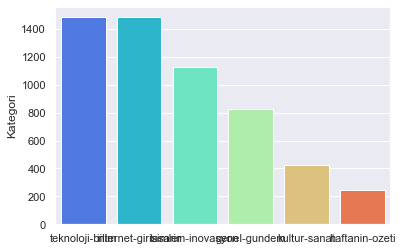

In [54]:
ax = sns.barplot(data.Kategori.value_counts().index, y=data.Kategori.value_counts(), data=data, palette="rainbow")

In [55]:
# Kategoriye göre veri seti dengesiz, dengeli hale getirelim.
print("Data'nın Bölünmeden Önceki Boyutu", len(text_data))
data_tekno = text_data[text_data.Kategori == 'teknoloji-bilim']
data_internet = text_data[text_data.Kategori == 'internet-girisimler']
data_inovasyon = text_data[text_data.Kategori == 'tasarim-inovasyon']
data_genel_gundem = text_data[text_data.Kategori == 'genel-gundem']
data_kultur_sanat = text_data[text_data.Kategori == 'kultur-sanat']
data_hafta = text_data[text_data.Kategori == 'haftanin-ozeti']
text_data = pd.concat([data_tekno.sample(len(data_kultur_sanat), random_state=39),
                       data_internet.sample(len(data_kultur_sanat), random_state=39),
                       data_inovasyon.sample(len(data_kultur_sanat), random_state=39),
                       data_genel_gundem.sample(len(data_kultur_sanat), random_state=39),
                       data_kultur_sanat,data_hafta])
print("Data'nın Yeni Boyutu: ", len(text_data))

Data'nın Bölünmeden Önceki Boyutu 5599
Data'nın Yeni Boyutu:  2388


In [182]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emrah.tema/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
# Word2Vec , kelimeleri vektör uzayında ifade etmeye çalışan unsupervised (no labels) ve tahmin 
# temelli(prediction-based) bir modeldir
# Evet şimdi öncelikle metinleri büyük bir string üzerinde toplayıp, bunları kelime kelime parçalayacağız
# Haber Metinlerini Büyük Bir String üzerinde toplayalım
big = " "
for text in data.Body_text:
    big = big + str(text)
# Şimdide bu string'i parçalayalım edelim
big_data = [] 
for i in sent_tokenize(big): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    big_data.append(temp)

In [57]:
# 300 değişkenli word2vec modeli
model = Word2Vec(big_data, size=300, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [58]:
# Bizim için önemli olan kelimeler etrafında işlem yaptıracağız
keys = ['teknoloji', 'bilişim', 'finans', 'dünya', 'yapay', 'blockchain', 'abd', 'google', 'facebook', 'apple']
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

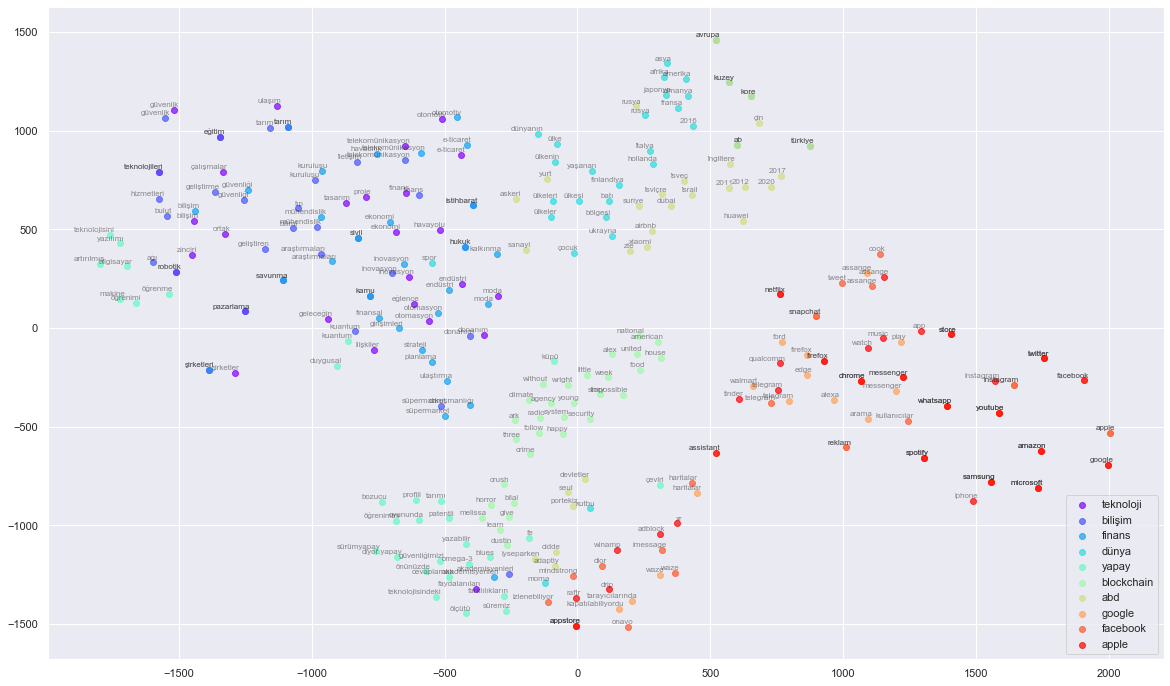

In [59]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(20, 12))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()
tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)